## Package Installation

In [ ]:
pip install packaging ninja

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.2 MB/s eta 0:00:00


In [ ]:
! pip install accelerate
! pip install flash_attn einops timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 68.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 67.8 MB/s eta 0:00:00
  Created wheel for flash_attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187309225 sha256=237ef9c6157db394e1ddde4ba609a21ebb98382377a27041edc09318801a6f24
  Stored in directory: /root/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash_attn


## Import Libraries

In [ ]:
from transformers import AutoModelForCausalLM,AutoProcessor
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch
import numpy as np
from PIL import Image,ImageDraw,ImageFont
from google.colab.patches import cv2_imshow
import cv2
import requests
import imageio
import os
import glob
import json

## Load Microsoft Florence-2 Model

In [ ]:
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large",trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Funtion For  Various Tasks:

In [ ]:
def florence_model(task_prompt,image,text_input=None):

  if text_input is None:
      prompt = task_prompt  # Only the task token
  else:
      prompt = task_prompt + text_input  # Task and text tokens

  inputs= processor(text=prompt, images=image,return_tensors="pt")

  generated_id= model.generate(input_ids=inputs["input_ids"],
                               pixel_values=inputs["pixel_values"],
                               max_new_tokens=1024,
                               num_beams=5)

  generated_text= processor.batch_decode(generated_id, skip_special_tokens=False)[0]

  parsed_text= processor.post_process_generation(text= generated_text,
                                                 task= prompt,
                                                 image_size= (image.shape[1],image.shape[0]))

  return parsed_text



In [30]:
img= cv2.imread('/content/sample data/2022-02-04-test_image.jpg')

In [31]:
task_prompt= "<OD>"
out= florence_model(task_prompt,img)

In [32]:
out['<OD>']

{'bboxes': [[318.8000183105469, 10.25, 658.0, 208.25],
  [321.20001220703125, 71.75, 454.8000183105469, 204.25],
  [0.4000000059604645, 219.75, 754.7999877929688, 499.25],
  [78.80000305175781, 217.25, 232.40000915527344, 497.25],
  [685.2000122070312, 191.75, 786.0, 444.25],
  [515.6000366210938, 73.25, 656.4000244140625, 207.25],
  [477.20001220703125, 396.25, 615.6000366210938, 499.25],
  [42.79999923706055, 375.25, 146.8000030517578, 483.75],
  [380.3999938964844, 99.25, 494.0, 201.75],
  [260.3999938964844, 296.75, 290.8000183105469, 320.75]],
 'labels': ['bicycle',
  'bicycle wheel',
  'car',
  'person',
  'person',
  'wheel',
  'wheel',
  'wheel',
  'wheel',
  'wheel']}

In [33]:
def visualization(image,data):

  for bbox,label in zip(data["bboxes"],data["labels"]):

    x1,y1,x2,y2 = map(int, bbox)

    cv2.rectangle(image,pt1=(x1,y1),pt2=(x2,y2),color=(0,255,0),thickness=2)

    cv2.putText(image,text=label,org=(x1,y1-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.7,color=(0,255,0),thickness=2)


  return image

In [34]:
data= out['<OD>']
detection= visualization(img,data)

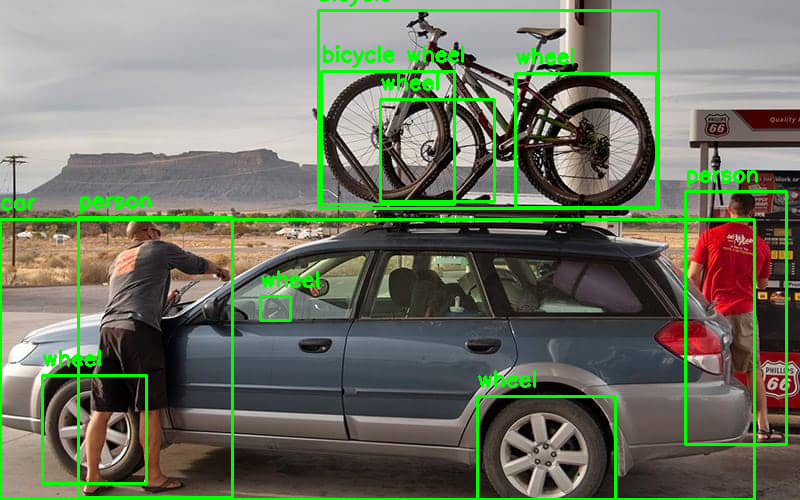

In [35]:
cv2_imshow(detection)

## Unzip Image Data

In [ ]:
! unzip /content/sample_data.zip

Archive:  /content/sample_data.zip
   creating: sample data/
  inflating: sample data/1_kW64v42Hb1CYZto8kbcXJA.png  
  inflating: sample data/2022-02-04-test_image.jpg  
  inflating: sample data/36girlcrossingwidestreet.jpg  
  inflating: sample data/Cars-detected-in-a-frame-Number-plate-Localization-is-the-step-where-the-number.png  


## Create Label Index and Yolo format funtion

In [27]:
def get_class_index(label):

  class_mapping= {
      'car':0,
      'person':1,
      'bicycle':2
  }

  return class_mapping.get(label,3)

def convert_to_yolo_format(bboxes,labels,image_width,image_height):

  yolo_annotations=[]

  for bbox,label in zip(bboxes,labels):
    x1,y1,x2,y2= bbox

    x_center= (x1+x2)/2/image_width
    y_center= (y1+y2)/2/image_height
    width= (x2-x1)/image_width
    height= (y2-y1)/image_height

    class_index= get_class_index(label)

    yolo_annotation= f"{class_index} {x_center} {y_center} {width} {height}"

    yolo_annotations.append(yolo_annotation)

  return yolo_annotations

## Finally process all image data to generate annotaions and convert it into yolo format

In [28]:
def process_images(data_path):

  image_files= glob.glob(data_path+"/*")

  for image_file in image_files:

    image= cv2.imread(image_file)

    task_prompt= "<OD>"

    results=florence_model(task_prompt,image)

    data= results['<OD>']
    bboxes = data['bboxes']
    labels = data['labels']


    image_height,image_width,_= image.shape

    yolo_annotations= convert_to_yolo_format(bboxes,labels,image_width,image_height)

    txt_file=os.path.basename(image_file).split('.')[0]

    output_file= os.path.join(data_path,txt_file+'.txt')
    with open(output_file,'w') as f:
      f.write('\n'.join(yolo_annotations))

  print ("Data annotation done successfully...")




## Output

In [29]:
process_images('/content/sample data')

Data annotation done successfully...
